In [1]:
# standard imports
import pandas as pd
import numpy as np
# import custom netdata stuff from our package
from netdata_api_utils.utils import api, get_metrics

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## df_allmetrics

In [2]:
df_allmetrics = pd.DataFrame.from_dict(api(endpoint='allmetrics',options='?format=json'),orient='index')
print(df_allmetrics.shape)
df_allmetrics.sample(10)

(201, 5)


,name,context,units,last_updated,dimensions
disk_space._,disk_space._,disk.space,GiB,1568666767,"{'avail': {'name': 'avail', 'value': 41.308139..."
ipv6.sockstat6_udp_sockets,ipv6.sockstat6_udp_sockets,ipv6.sockstat6_udp_sockets,sockets,1568666767,"{'inuse': {'name': 'inuse', 'value': 4.0}}"
groups.threads,groups.threads,groups.threads,threads,1568666767,"{'ntp': {'name': 'ntp', 'value': 2.0}, 'netdat..."
groups.processes,groups.processes,groups.processes,processes,1568666767,"{'ntp': {'name': 'ntp', 'value': 1.0}, 'netdat..."
netdata.plugin_statsd_collector1_cpu,netdata.plugin_statsd_collector1_cpu,netdata.statsd_cpu,milliseconds/s,1568666767,"{'user': {'name': 'user', 'value': 0.0}, 'syst..."
disk_backlog.sda,disk_backlog.sda,disk.backlog,milliseconds,1568666767,"{'backlog': {'name': 'backlog', 'value': 0.894..."
users.swap,users.swap,users.swap,MiB,1568666767,"{'ntp': {'name': 'ntp', 'value': 0.0}, 'netdat..."
users.files,users.files,users.files,open files,1568666767,"{'ntp': {'name': 'ntp', 'value': 1.0}, 'netdat..."
netdata.response_time,netdata.response_time,netdata.response_time,milliseconds/request,1568666767,"{'average': {'name': 'average', 'value': 0.583..."
netdata.plugin_statsd_charting_cpu,netdata.plugin_statsd_charting_cpu,netdata.statsd_cpu,milliseconds/s,1568666767,"{'user': {'name': 'user', 'value': 0.0}, 'syst..."


## df

In [3]:
n_metrics = 10
mins_lag = 60*4
#metrics_list = np.random.choice(df_allmetrics['name'].unique(),n_metrics,replace=False).tolist()
metrics_list = [metric for metric in df_allmetrics['name'].unique() if 'cpu' in metric]
#metrics_list ['users.cpu']
df = get_metrics(metrics_list,after=-(60*mins_lag),before=0)
print(df['timestamp'].min(),df['timestamp'].max())
print(df.shape)
df.sample(10)

2019-09-16 19:46:40 2019-09-16 20:40:00
(1962, 4)


,timestamp,key,label,value
19,2019-09-16 20:33:20,users.cpu_system,root,0.395769
44,2019-09-16 19:46:40,apps.cpu_system,logs,0.000000
33,2019-09-16 20:00:00,cpu.cpu2_interrupts,RES,8.025581
23,2019-09-16 20:06:40,cpu.cpu0_softirqs,SCHED,12.724073
59,2019-09-16 20:06:40,cpu.cpu3_interrupts,MCP,0.005000
49,2019-09-16 20:13:20,cpu.cpu0,user,2.044894
48,2019-09-16 20:20:00,cpu.cpu0,user,3.778820
9,2019-09-16 20:40:00,netdata.server_cpu,system,0.280000
19,2019-09-16 20:33:20,cpu.cpu2,steal,0.000000
37,2019-09-16 20:33:20,groups.cpu,andrewm4894,81.274451


## Save Data

In [4]:
# save sample of data
df.to_csv('../data/netdata_sample.csv',index=False)

## Plots

/home/andrewm4894/anaconda3/envs/netdata-learn/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


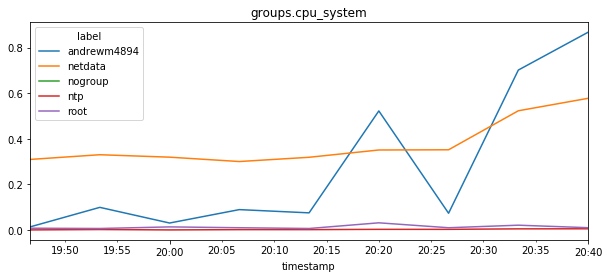

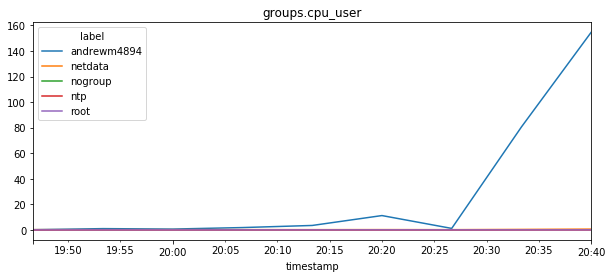

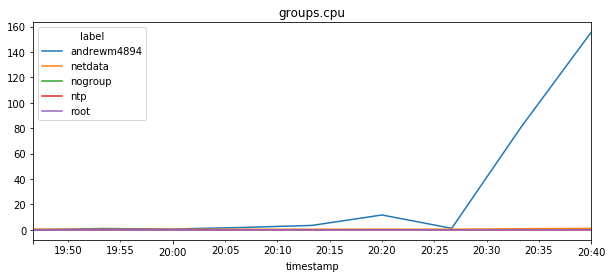

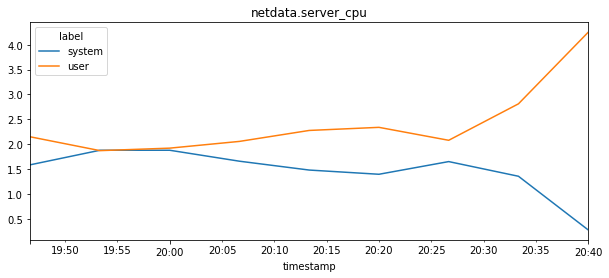

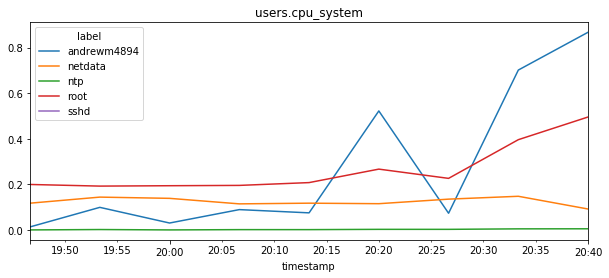

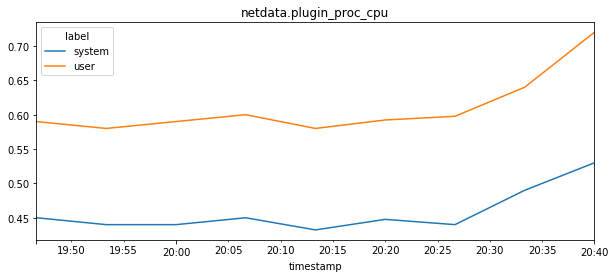

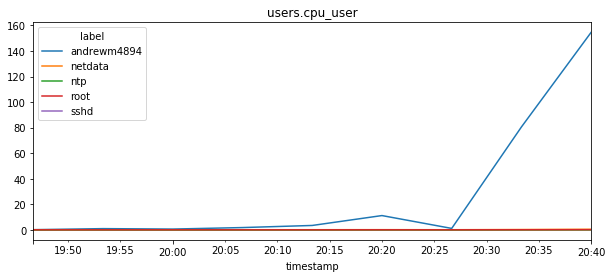

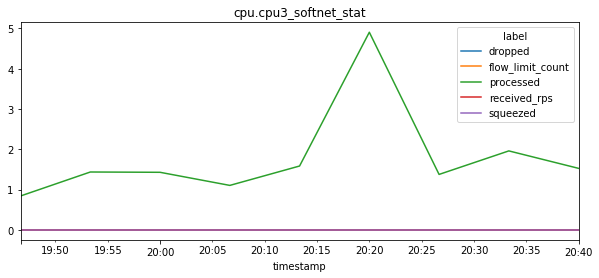

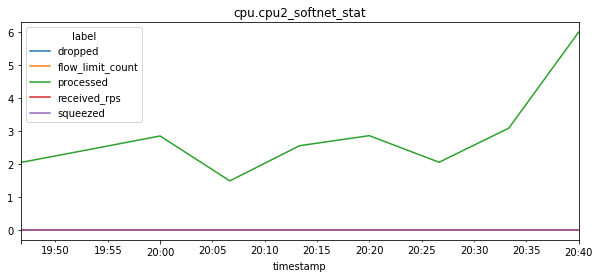

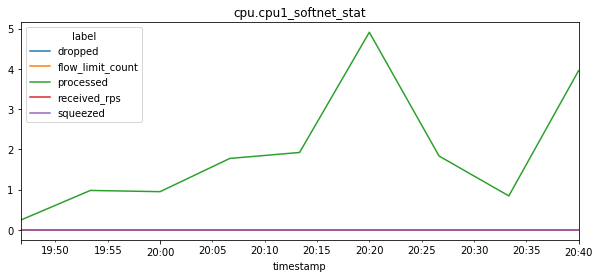

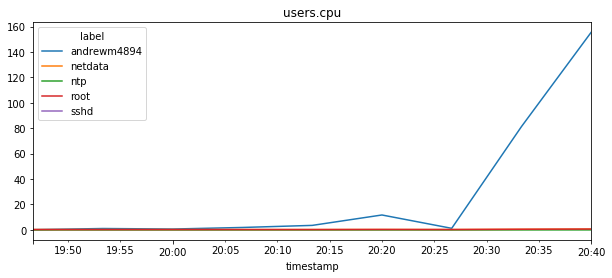

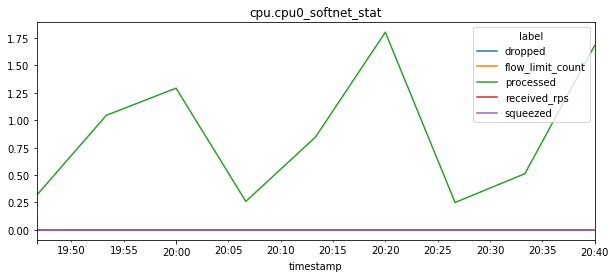

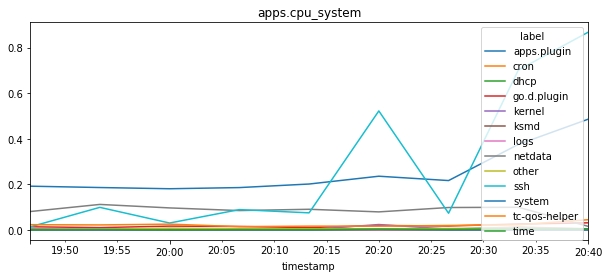

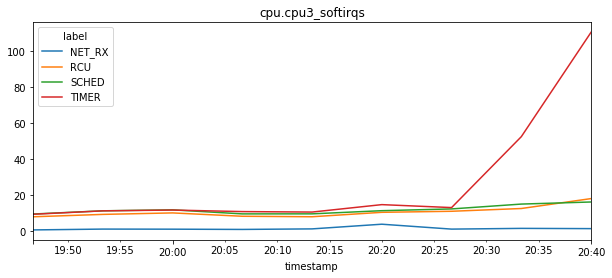

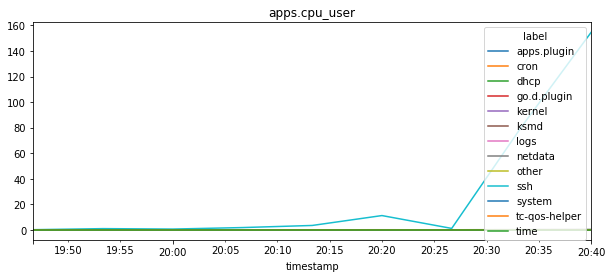

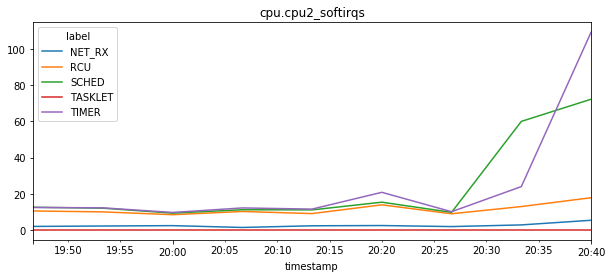

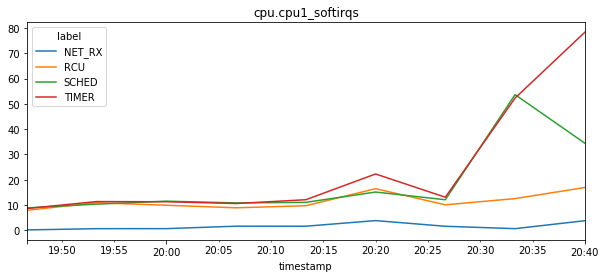

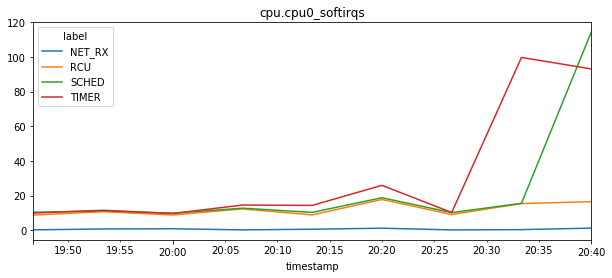

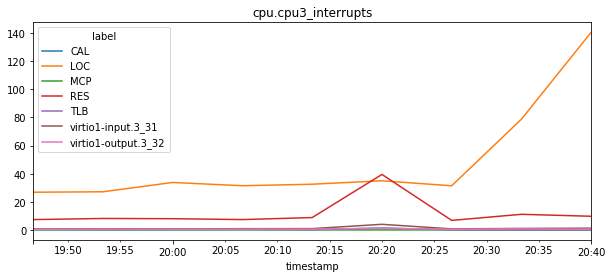

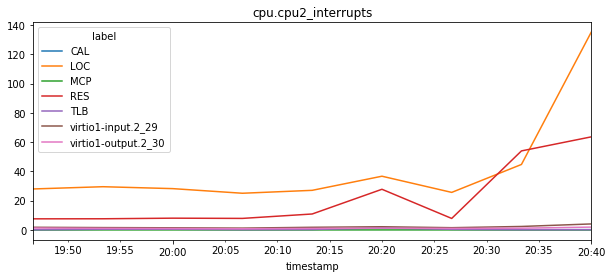

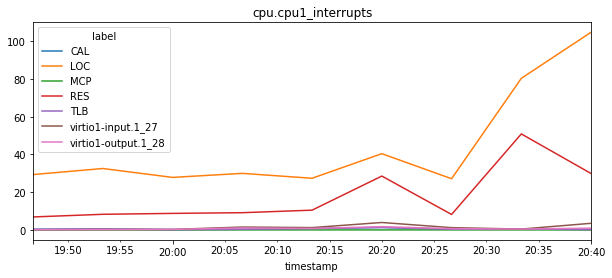

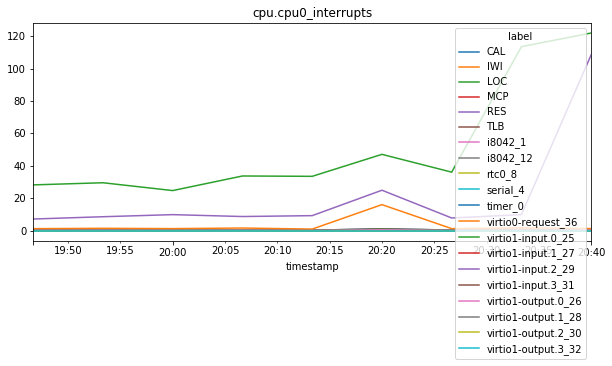

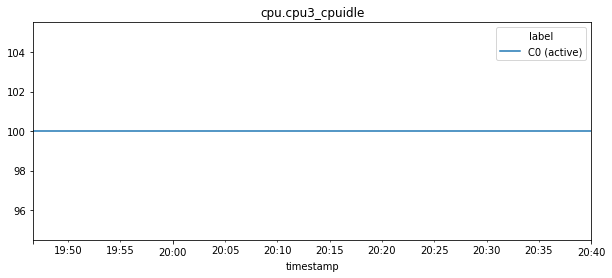

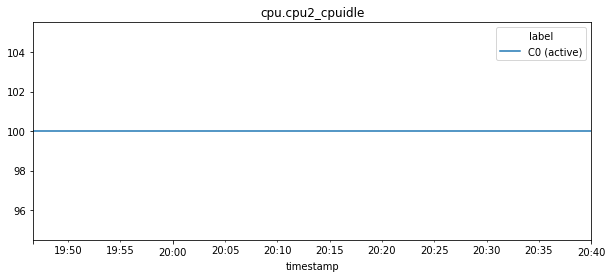

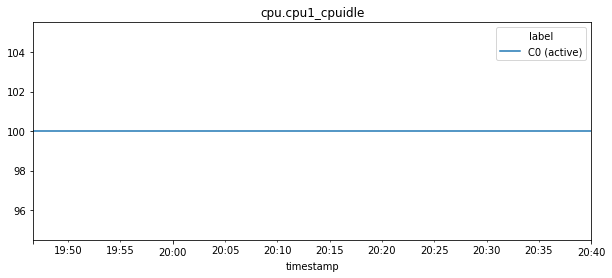

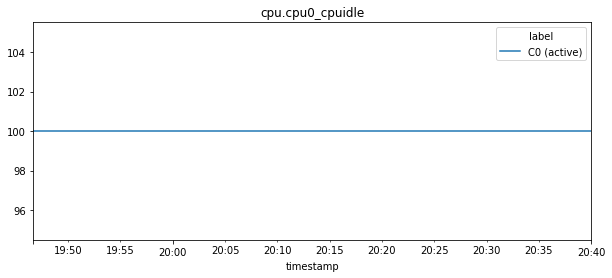

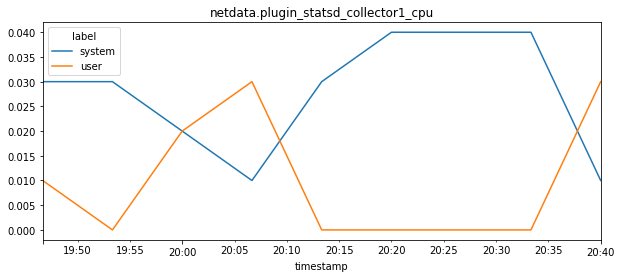

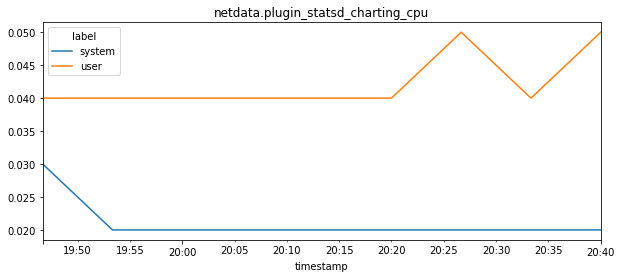

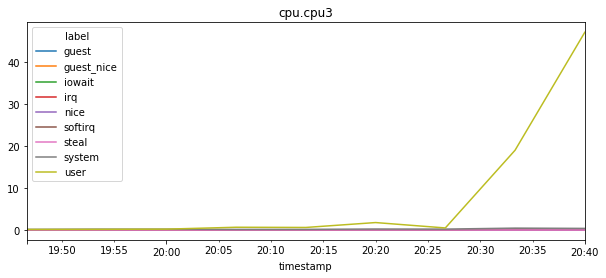

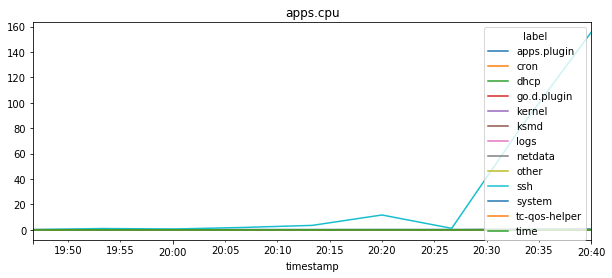

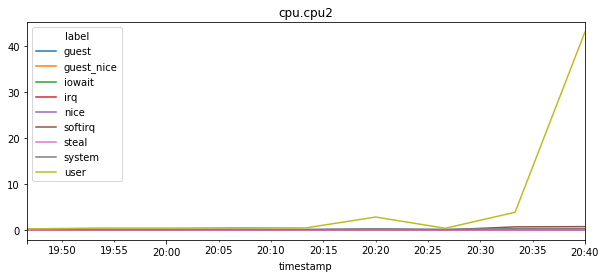

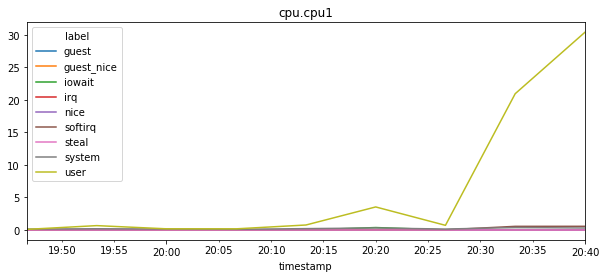

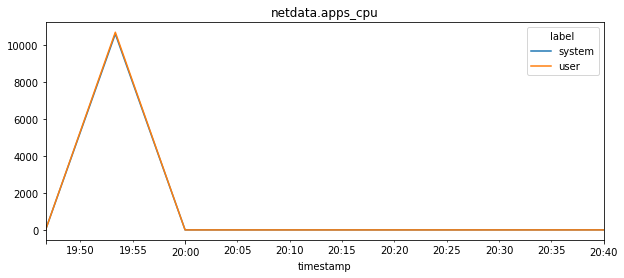

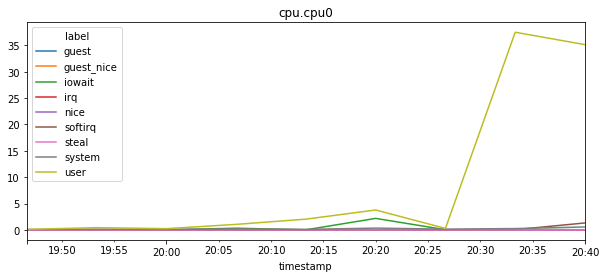

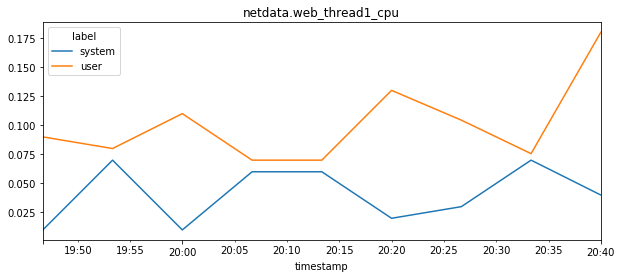

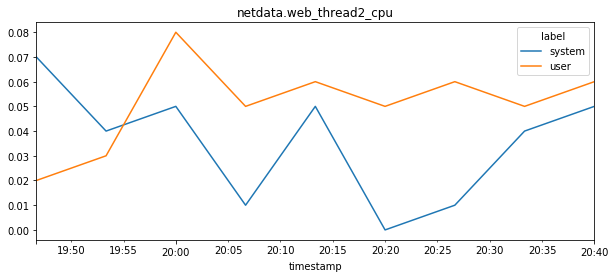

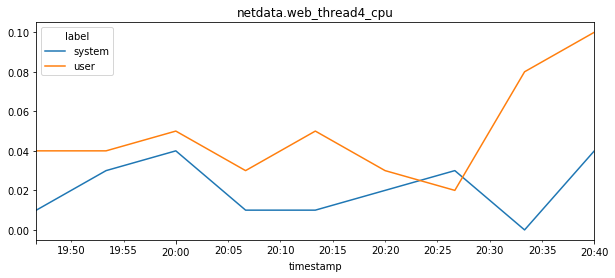

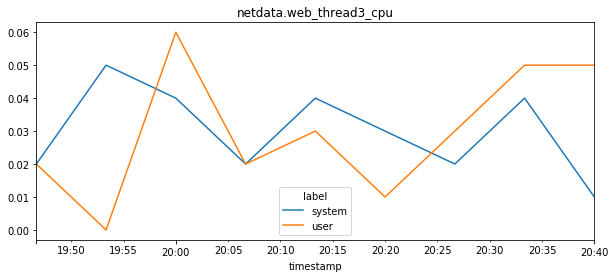

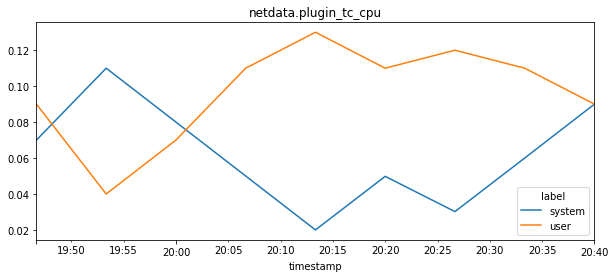

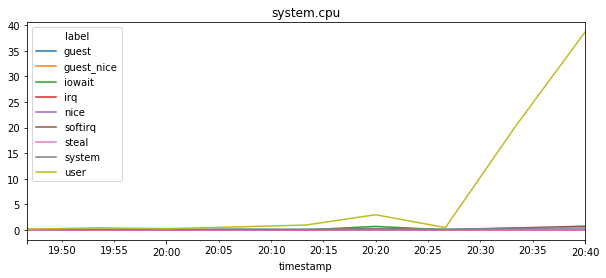

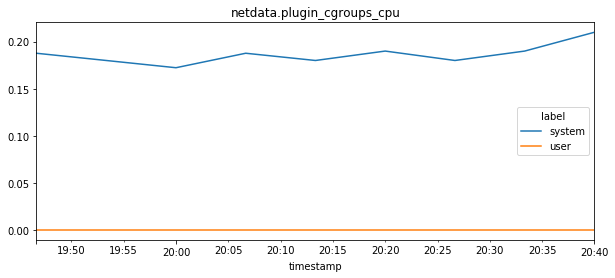

In [5]:
# plots
for metric in metrics_list:
    df[df['key']==metric].pivot(index='timestamp',columns='label',values='value').plot(title=metric, figsize=(10,4))